# Algorithms and Data Structures Assignment 1
Submitted by: Vipul Krishnan M.D. <br>
Student ID: 28104641

#### Importing all required libraries

In [143]:
from operator import itemgetter, attrgetter
import timeit
from random import randint
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### 1) Creating ADT Point Class

In [144]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def translate(self, x, y):
        self.x = x
        self.y = y

    def distance(self, point):
        return abs(self.x - point.x) + abs(self.y - point.y)
    
    def get_x(self):
        return self.x
    
    def get_y(self):
        return self.y
    
    def set_x(self, x1):
        self.x = x1
    
    def set_y(self, y1):
        self.y = y1

    def distance_origin(self):
        return abs(self.x - 0) + abs(self.y - 0)
     
    def print_point(self):
        print('(', self.x, ',', self.y, ')')

### 2) Creating PointSet class <br>and<br> 3) Adding Brute Force and Devide and Conquer methods.

#### What should be modified in the algorithm
As we need Manhattan distance, instead of taking distance between two points as SquareRoot(square(x1-x2) + square(y1-y1)) we need to take as abs(x1-x2) + abs(y1-y2). This has to be changed in the algorithm.

In [145]:
class PointSet:
    def __init__(self):
        self.points = []

    def set_points(self, new):
        self.points = new
    
    def get_points(self):
        return self.points

    def insert(self, point):
        self.points.append(point)

    def delete(self, point):
        for p in self.points:
            if p.x == point.x and p.y == point.y:
                self.points.remove(p)
                
    def closest_points_brute(self):
        minimum = float('inf')
        min_one = None
        min_two = None
        for p in self.points:
            for q in self.points:
                if p != q:
                    if abs(p.x - q.x) + abs(p.y - q.y) < minimum:
                        minimum = abs(p.x - q.x) + abs(p.y - q.y)
                        min_one = p
                        min_two = q
        return minimum, min_one, min_two
    
    # This is a helper method which pre-sorts the list by x and y coordinats and calls the main function  
    def closestPair(self):
        xsorted = sorted(self.points, key=lambda z: z.x)
        ysorted = sorted(self.points, key=lambda z: z.y)
        return self.closestPairContinue(xsorted, ysorted)
    
    # The main devide and conquer function
    def closestPairContinue(self, xsorted, ysorted):
        # If the number of points is less than 4, it goes for brute-force. 
        if len(xsorted) <= 3:
            minimum = float('inf')
            min_one = None
            min_two = None
            for p in xsorted:
                for q in xsorted:
                    if p != q:
                        if abs(p.x - q.x) + abs(p.y - q.y) < minimum:
                            minimum = abs(p.x - q.x) + abs(p.y - q.y)
                            min_one = p
                            min_two = q
            return minimum, min_one, min_two
        
        # If n > 3, It goes for devide and conquer.
        else:
            length = len(xsorted)
            
            # Dividing the x sorted list into two halves 
            left_setX = xsorted[:length//2]
            right_setX = xsorted[length//2:]
            
            # Creating Y sorted two halves based on the X- sorted ones
            left_setY = []
            right_setY = []
            boundary = xsorted[(length // 2)-1]
            
            # Instead of sorting the two lists again by Y,the below code uses a simpler method.
            # This reduces the complexity from 'nlogn' to 'n'
            for i in ysorted:
                if i.x <= boundary.x:
                    left_setY.append(i)
                else:
                    right_setY.append(i)
            
            # Recursion
            dmin_left, x_left, y_left = self.closestPairContinue(left_setX, left_setY)
            dmin_right, x_right, y_right = self.closestPairContinue(right_setX, right_setY)
            
            # Finding the minimum
            dmin, x, y = (dmin_left, x_left, y_left) if dmin_left < dmin_right else (dmin_right, x_right, y_right)

            # Finding the points within 'dmin' from the division line
            gappoints = [p for p in ysorted if abs(p.x - left_setX[-1].x) < dmin]
            
            # Checking if there is any closer points in the gap.
            lengap = len(gappoints)
            if lengap > 1:
                newlen = min(((abs(gappoints[i].x - gappoints[j].x) + abs(gappoints[i].y - gappoints[j].y), gappoints[i],
                              gappoints[j])
                              for i in range(lengap - 1)
                              for j in range(i + 1, min(i+16,lengap))), key=itemgetter(0))
                if newlen[0] < dmin:
                    return newlen[0], newlen[1], newlen[2]
                else:
                    return dmin, x, y
            return dmin, x, y

In [146]:
# This is an extra function 
# This function randomly inserts n points into a PointSet and returns it.
def theInserter(n):
    ps = PointSet()
    for i in range(0, n):
        x = randint(-20, 20)
        y = randint(-20, 20)
        point = Point(x, y)
        ps.insert(point)
    return ps


In [147]:
#This is an extra function.
#This method automates the test by comparing the dmin from different methods for a number of times
#testnum : Number of times the test has to be repeated
#maxpoint: Maximum number of points that can be inserted n a test
def autoTester(testnum, maxpoint):
    for i in range (0,testnum):
        ps = theInserter(randint(2,maxpoint))
        dmin, x, y = ps.closestPair()
        #print("dmin from devide and conquer method")
        #print(dmin)

        dmin1, x, y = ps.closest_points_brute()
        #print("dmin from brute force method")
        #print(dmin1)
        
        if (dmin1 != dmin):
            return "Something Went Wrong"
    return "Works Fine!"

print(autoTester(100, 20))

Works Fine!


### 4) Empirical Runtime Evaluation

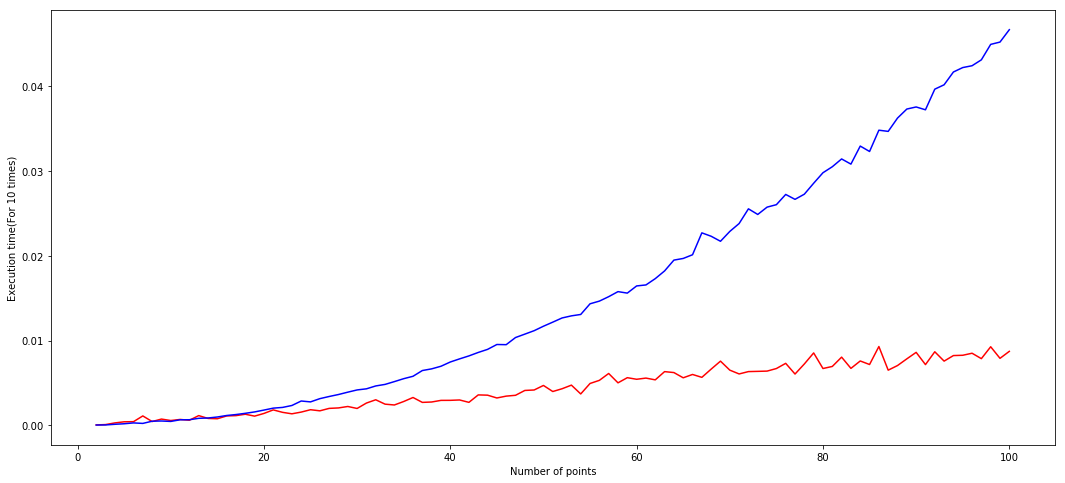

In [148]:
# This method returns a plot which compares different distance measuring methods' runtime for
# various number of points from 2 to n
def plotter(n):
    a = []
    b = []
    d = []
    for i in range(2, n + 1):
        c = theInserter(i)
        a.append(np.mean(timeit.Timer(c.closestPair).repeat(5, 10)))
        b.append(np.mean(timeit.Timer(c.closest_points_brute).repeat(5, 10)))

    fig, pltr = plt.subplots(figsize=(18,8))
    pltr.plot(range(2, n + 1), a, 'r-')
    pltr.plot(range(2, n + 1), b, 'b-')
    pltr.set_xlabel("Number of points")
    pltr.set_ylabel("Execution time(For 10 times)")
    
plotter(100)

Blue : Brute Force Method <br>
Red: Devide and Conquer

#### Discussion
Yes, the plot proves the theory and expectations. The time complexity of brute force method is n*n and the divide and conquer method is n*log(n). The corresponding curves also show the same shapes as these functions’ shapes. The brute force’s running time increases faster with n compared to the divide and conquer method which proves that the divide and conquer is better for large values of n. However for very small values of n, the brute force method seems to be more suitable. This is due to the other non-dominant terms’ (of recurrence relation.) effects. 

### 5) Recurrence Relation
For the above method, the recurrence relation would be
T(n) = 2*T(n/2) + a*n + c
where a and c can take different values based on the point distributions.

If the unsorted list is provided to the function and function sorts it each time (both X-based and Y-based sorting), an additional term of 2*n*log(n) comes in picture, where log is base 2. So the recurrence relation would become

T(n) = 2*T(n/2) + a*n + 2*n*log(n) + c

### Bonus) Visualization
The same PointSet class in the above code is rewritten here along with some visualization codes. To avoid time delay due to plotting , the visualization codes were not added in the previously defined PointSet class.

In [149]:
class PointSet:
    def __init__(self):
        self.points = []

    def setPoints(self, new):
        self.points = new
    
    def getPoints(self):
        return self.points

    def insert(self, point):
        self.points.append(point)

    def delete(self, point):
        for p in self.points:
            if p.x == point.x and p.y == point.y:
                self.points.remove(p)

    def closest_points_brute(self):
        minimum = float('inf')
        min_one = None
        min_two = None
        for p in self.points:
            for q in self.points:
                if p != q:
                    if abs(p.x - q.x) + abs(p.y - q.y) < minimum:
                        minimum = abs(p.x - q.x) + abs(p.y - q.y)
                        min_one = p
                        min_two = q
        return minimum, min_one, min_two 

    
    def closestPair(self):
        xsorted = sorted(self.points, key=lambda z: z.x)
        ysorted = sorted(self.points, key=lambda z: z.y)
        # Plotting points in both figures
        ax.scatter([o.x for o in xsorted], [o.y for o in xsorted])
        ay.scatter([o.x for o in xsorted], [o.y for o in xsorted])
        return self.closestPairContinue(xsorted, ysorted)

    def closestPairContinue(self, xsorted, ysorted):
        
        if len(xsorted) <= 3:
            minimum = float('inf')
            min_one = None
            min_two = None
            for p in xsorted:
                for q in xsorted:
                    if p != q:
                        if abs(p.x - q.x) + abs(p.y - q.y) < minimum:
                            minimum = abs(p.x - q.x) + abs(p.y - q.y)
                            min_one = p
                            min_two = q
            return minimum, min_one, min_two
        else:
            length = len(xsorted)
            left_setX = xsorted[:length//2]
            right_setX = xsorted[length//2:]
            left_setY = []
            right_setY = []
            boundary = xsorted[(length // 2)-1]
            # plotting division lines
            ax.axvline(x=boundary.x)
            for i in ysorted:
                if i.x <= boundary.x:
                    left_setY.append(i)
                else:
                    right_setY.append(i)
            dmin_left, x_left, y_left = self.closestPairContinue(left_setX, left_setY)
            dmin_right, x_right, y_right = self.closestPairContinue(right_setX, right_setY)
            dmin, x, y = (dmin_left, x_left, y_left) if dmin_left < dmin_right else (dmin_right, x_right, y_right)
           
            colors = ['#12efff','#eee111','#eee00f','#e00fff','#123456','#abc222','#000000','#123fff','#1eff1f','#2edf4f','#2eaf9f','#22222f',
        '#eeeff1','#eee112','#00ef00','#aa0000','#0000aa','#000999','#32efff','#23ef68','#2e3f56','#7eef1f','#eeef11']
            m = randint(-20,20)
            
            gappoints = [p for p in ysorted if abs(p.x - left_setX[-1].x) < dmin]
            lengap = len(gappoints)
            if lengap > 1:
                # Plotting figure 2
                ay.axvline(x=(boundary.x))
                ay.axvspan(boundary.x+dmin, boundary.x-dmin, alpha=0.3, color=colors[randint(0,20)])
                newlen = min(((
                              abs(gappoints[i].x - gappoints[j].x) + abs(gappoints[i].y - gappoints[j].y), gappoints[i],
                              gappoints[j])
                              for i in range(lengap - 1)
                              for j in range(i + 1, min(i+16,lengap))), key=itemgetter(0))
                if newlen[0] < dmin:
                    return newlen[0], newlen[1], newlen[2]
                else:
                    return dmin, x, y
            return dmin, x, y

Plot Showing Division Lines


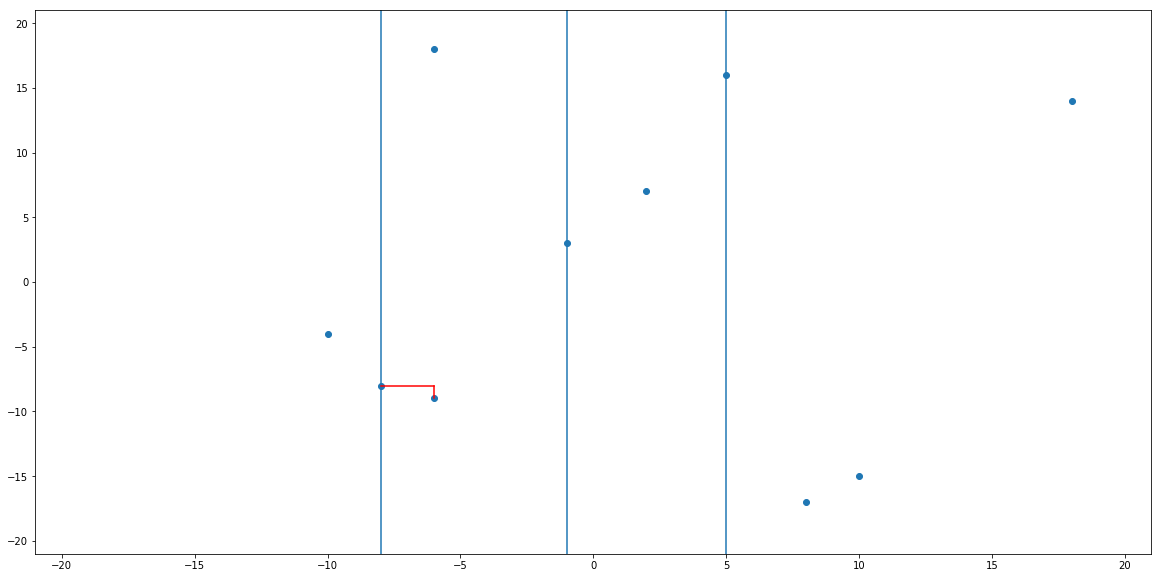

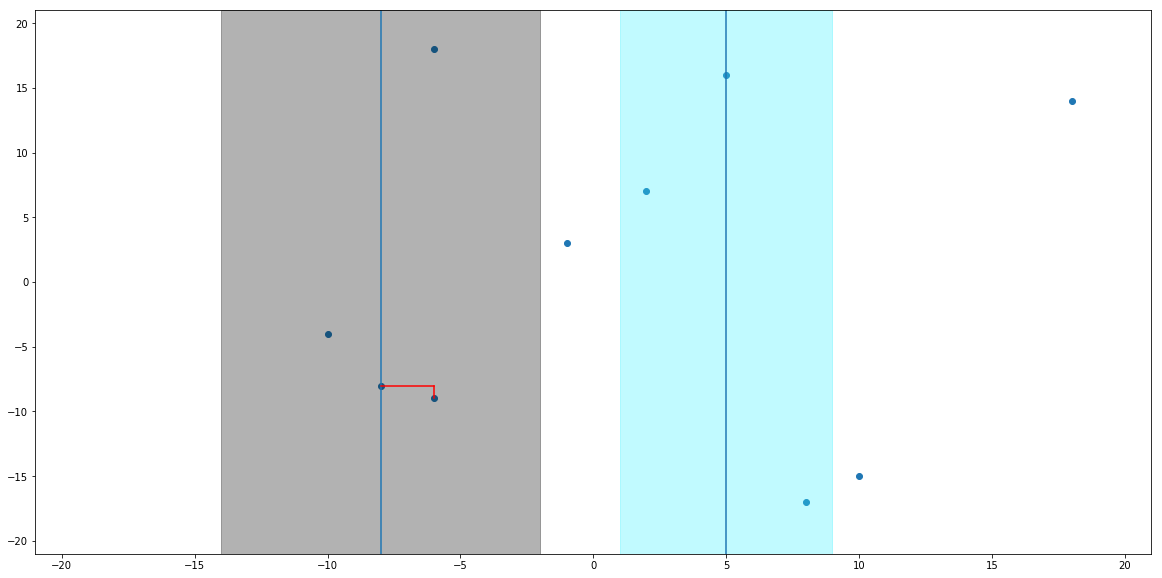

Plot Showing Gap Regions


In [154]:
# This plot shows all divisions made during the process
fig, ax = plt.subplots(figsize=(20,10))
plt.ylim([-21,21])
plt.xlim([-21,21])

# This plot shows (dividingPoint - dmin) to  (dividingPoint + dmin) region.
# Note that, not all division lines has this region. Only those places where this operation performed are shown.
fig, ay = plt.subplots(figsize=(20,10))
plt.ylim([-21,21])
plt.xlim([-21,21])

# Inserting points. More the number of points, more complicated is the plot.
ps = theInserter(10)

# Calling function
dmin, x, y = ps.closestPair()

# Plotting minimum distance
v,w = [x.x, x.x], [x.y, y.y]
t,u = [x.x, y.x], [y.y, y.y]
ax.plot(v,w,'r-')
ax.plot(t,u,'r-')
ay.plot(v,w,'r-')
ay.plot(t,u,'r-')
print("Plot Showing Division Lines")
plt.show()
print("Plot Showing Gap Regions")

Figure 1 shows the points, shortest distance, and division lines. Figure 2 shows the regions analysed for pairs with one point left, and one point right ('dmin' distance around the division line). Please note that not all division lines are drawn in the second figure. Only those division lines around which the analysis is performed is shown. 